# Clustering

# Q1

Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.Perform clustering (Both hierarchical and K means clustering) for the airlines data to obtain optimum number of clusters

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

In [2]:
df = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [3]:
df.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

# EDA

In [4]:
df.describe()

ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000

In [5]:
df.shape

(3999, 12)

In [6]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [7]:
df.isnull()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0     False    False       False      False      False      False   
1     False    False       False      False      False      False   
2     False    False       False      False      False      False   
3     False    False       False      False      False      False   
4     False    False       False      False      False      False   
...     ...      ...         ...        ...        ...        ...   
3994  False    False       False      False      False      False   
3995  False    False       False      False      False      False   
3996  False    False       False      False      False      False   
3997  False    False       False      False      False      False   
3998  False    False       False      False      False      False   

      Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
0           False        False              False            False   
1           False        False              False            False   
2           False        False              False            False   
3           False        False              False            False   
4           False        False              False            False   
...           ...          ...                ...              ...   
3994        False        False              False            False   
3995        False        False              False            False   
3996        False        False              False            False   
3997        False        False              False            False   
3998        False        False              False            False   

      Days_since_enroll  Award?  
0                 False   False  
1                 False   False  
2                 False   False  
3                 False   False  
4                 False   False  
...                 ...     ...  
3994              False   False  
3995              False   False  
3996              False   False  
3997              False   False  
3998              False   False  

[3999 rows x 12 columns]

In [8]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

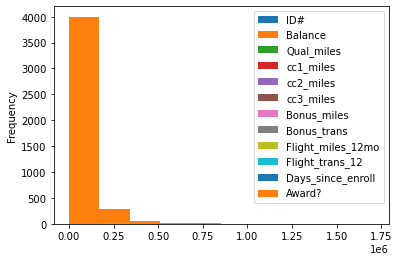

In [9]:
df.plot.hist()

<AxesSubplot:ylabel='Award?'>

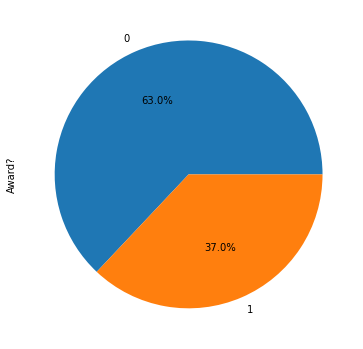

In [10]:
plt.figure(figsize=(6,8))
df['Award?'].value_counts().plot(kind='pie',autopct="%1.1f%%")

<AxesSubplot:>

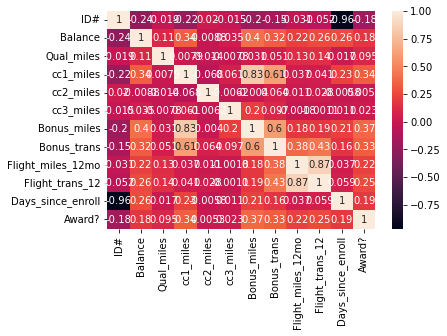

In [11]:
sns.heatmap(df.corr(), annot = True)

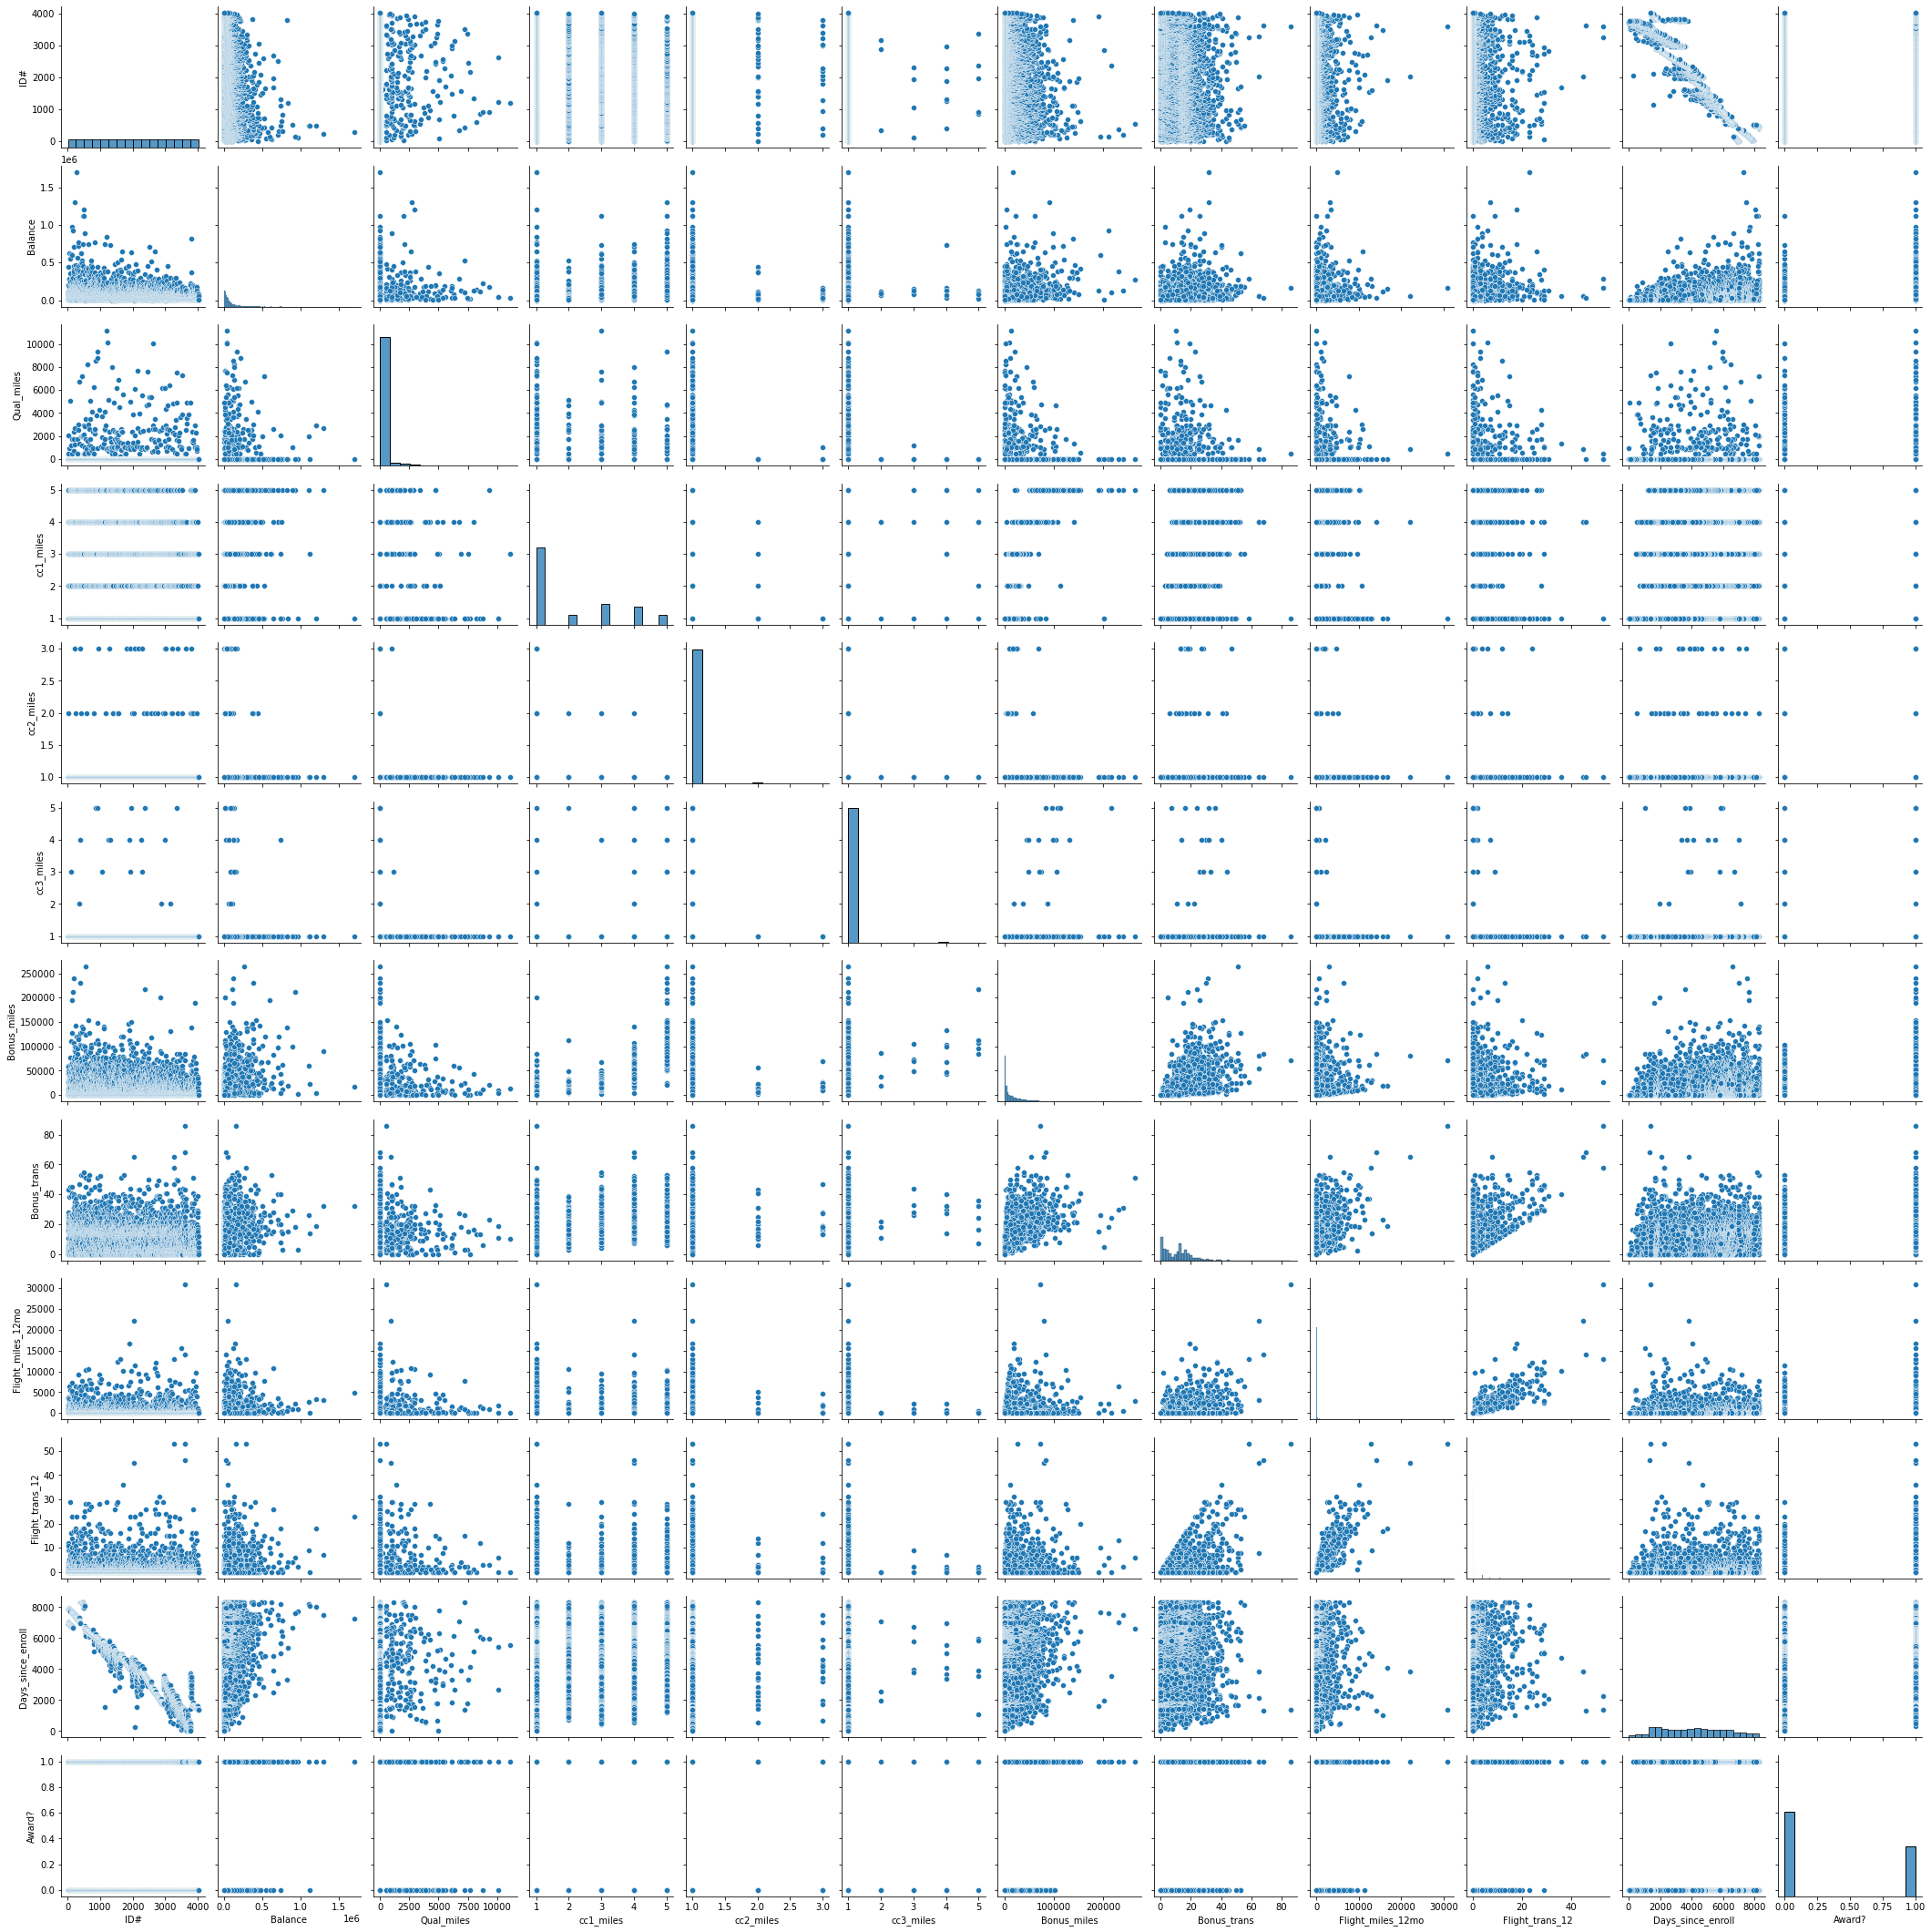

In [12]:
sns.pairplot(df) 

In [13]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [14]:
df_norm = norm_func(df.iloc[:,1:])
df_norm.iloc[:,:]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     0.016508         0.0       0.00        0.0        0.0     0.000660   
1     0.011288         0.0       0.00        0.0        0.0     0.000815   
2     0.024257         0.0       0.00        0.0        0.0     0.015636   
3     0.008667         0.0       0.00        0.0        0.0     0.001896   
4     0.057338         0.0       0.75        0.0        0.0     0.164211   
...        ...         ...        ...        ...        ...          ...   
3994  0.010837         0.0       0.00        0.0        0.0     0.032330   
3995  0.037766         0.0       0.00        0.0        0.0     0.003720   
3996  0.043169         0.0       0.50        0.0        0.0     0.096505   
3997  0.032202         0.0       0.00        0.0        0.0     0.001896   
3998  0.001769         0.0       0.00        0.0        0.0     0.000000   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0        0.011628           0.000000         0.000000           0.843742   
1        0.023256           0.000000         0.000000           0.839884   
2        0.046512           0.000000         0.000000           0.847842   
3        0.011628           0.000000         0.000000           0.837955   
4        0.302326           0.067398         0.075472           0.835905   
...           ...                ...              ...                ...   
3994     0.046512           0.006490         0.018868           0.168917   
3995     0.058140           0.000000         0.000000           0.167953   
3996     0.093023           0.000000         0.000000           0.168797   
3997     0.011628           0.016225         0.018868           0.168676   
3998     0.000000           0.000000         0.000000           0.168314   

      Award?  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        1.0  
...      ...  
3994     1.0  
3995     1.0  
3996     1.0  
3997     0.0  
3998     0.0  

[3999 rows x 11 columns]

# Hierarchical

Text(0.5, 1.0, 'Ward Linkage Dendogram')

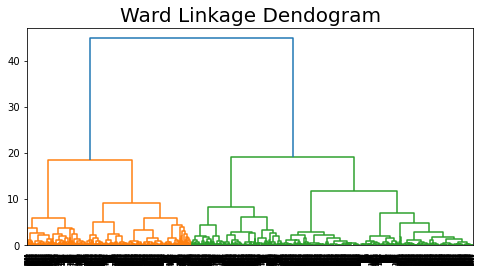

In [15]:
fig = plt.figure(figsize = (8,4))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward'))
plt.title('Ward Linkage Dendogram', size = 20)

Text(0.5, 1.0, 'Single Linkage Dendogram')

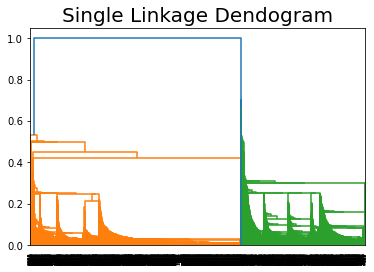

In [16]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))
plt.title('Single Linkage Dendogram', size = 20)

Text(0.5, 1.0, 'Complete Linkage Dendogram')

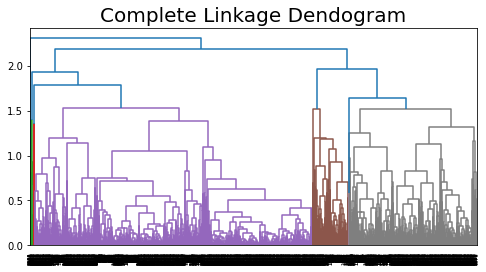

In [17]:
fig = plt.figure(figsize = (8,4))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))
plt.title('Complete Linkage Dendogram', size = 20)

Text(0.5, 1.0, 'Complete Linkage Dendogram')

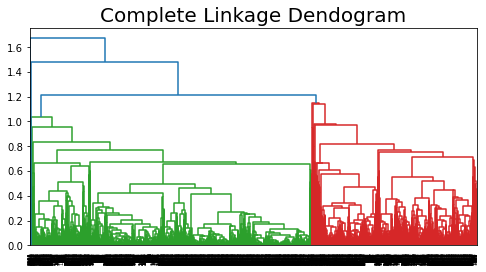

In [18]:
fig = plt.figure(figsize = (8,4))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))
plt.title('Complete Linkage Dendogram', size = 20)

In [19]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
hc.fit_predict(df_norm)

array([1, 1, 1, ..., 0, 4, 4], dtype=int64)

In [20]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

Clusters
0            1
1            1
2            1
3            1
4            3
...        ...
3994         0
3995         0
3996         0
3997         4
3998         4

[3999 rows x 1 columns]

# Kmeans

In [21]:
from sklearn.cluster import KMeans

In [22]:
df = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [23]:
df_norm = norm_func(df.iloc[:,1:])

In [24]:
model_kmeans = KMeans(n_clusters=5) 
model_kmeans.fit(df_norm)

KMeans(n_clusters=5)

In [25]:
model_kmeans.labels_

array([0, 0, 0, ..., 2, 4, 4])

In [26]:
md=pd.Series(model_kmeans.labels_)

In [27]:
df["labels"]=pd.Series(model_kmeans.labels_)
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  labels  
0          0       0  
1          0       0  
2          0       0  
3          0       0  
4          1       2  
...      ...     ...  
3994       1       1  
3995       1       1  
3996       1       2  
3997       0       4  
3998       0       4  

[3999 rows x 13 columns]

In [37]:
s = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 12)
    kmeans.fit(df)
    s.append(kmeans.inertia_)

C:\Users\asus\AppData\Local\Temp/ipykernel_16072/1601746706.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(1,11),s, 'bo-', color = 'g')


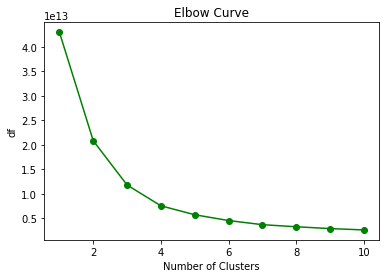

In [38]:
plt.plot(range(1,11),s, 'bo-', color = 'g')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('df')
plt.show()

# DBSCAN

In [28]:
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler

In [29]:
stscaler = StandardScaler().fit(df)
X = stscaler.transform(df)
X

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
         1.39545434e+00, -7.66919299e-01, -1.38855365e+00],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
         1.37995704e+00, -7.66919299e-01, -1.38855365e+00],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
         1.41192021e+00, -7.66919299e-01, -1.38855365e+00],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -1.31560393e+00,  1.30391816e+00, -4.58318399e-02],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -1.31608822e+00, -7.66919299e-01,  1.29688997e+00],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -1.31754109e+00, -7.66919299e-01,  1.29688997e+00]])

In [30]:
dbscan = DBSCAN(eps=1, min_samples=12)
dbscan.fit(X)

DBSCAN(eps=1, min_samples=12)

In [31]:
dbscan.labels_

array([0, 0, 0, ..., 1, 2, 2], dtype=int64)

In [32]:
db=pd.DataFrame(dbscan.labels_,columns=['cluster'])
db

cluster
0           0
1           0
2           0
3           0
4          -1
...       ...
3994        1
3995        1
3996        1
3997        2
3998        2

[3999 rows x 1 columns]

In [33]:
pd.concat([df,db],axis=1)

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  labels  cluster  
0          0       0        0  
1          0       0        0  
2          0       0        0  
3          0       0        0  
4          1       2       -1  
...      ...     ...      ...  
3994       1       1        1  
3995       1       1        1  
3996       1       2        1  
3997       0       4        2  
3998       0       4        2  

[3999 rows x 14 columns]

# Conclusion

From the above table, it is evident that different types of hierarchical clustering is way more complex to understand and Average Linkage is giving better result compared to other hierarchical clustering. From all the clustering methods DBSCAN Clustering also provides the better result.